In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_path = "/home/pravij07/Downloads/50_Startups.csv"
df = pd.read_csv(file_path)

print(df.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


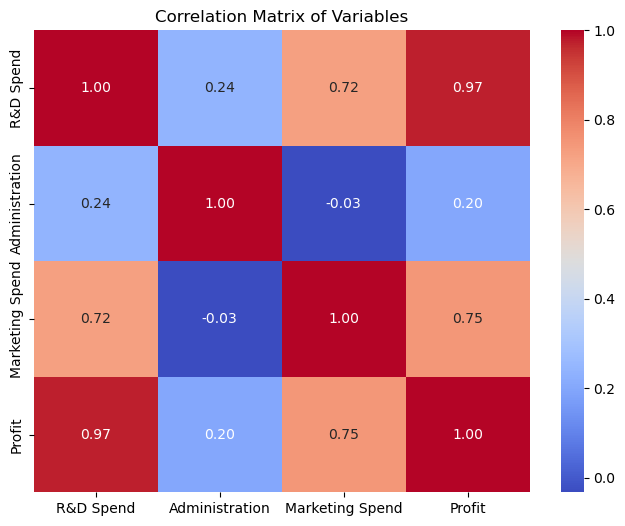

In [3]:
print("\nDataset Information:")
print(df.info())

numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Variables")
plt.show()
'''
Selecting Variables for Prediction:
   Profit is the target variable.
   'R&D Spend' and 'Marketing Spend' show strong correlation with Profit.
   'Administration' has a weak correlation.
   'State' is categorical and requires encoding if included.
   R&D Spend and Marketing Spend are chosen as primary predictors.
'''

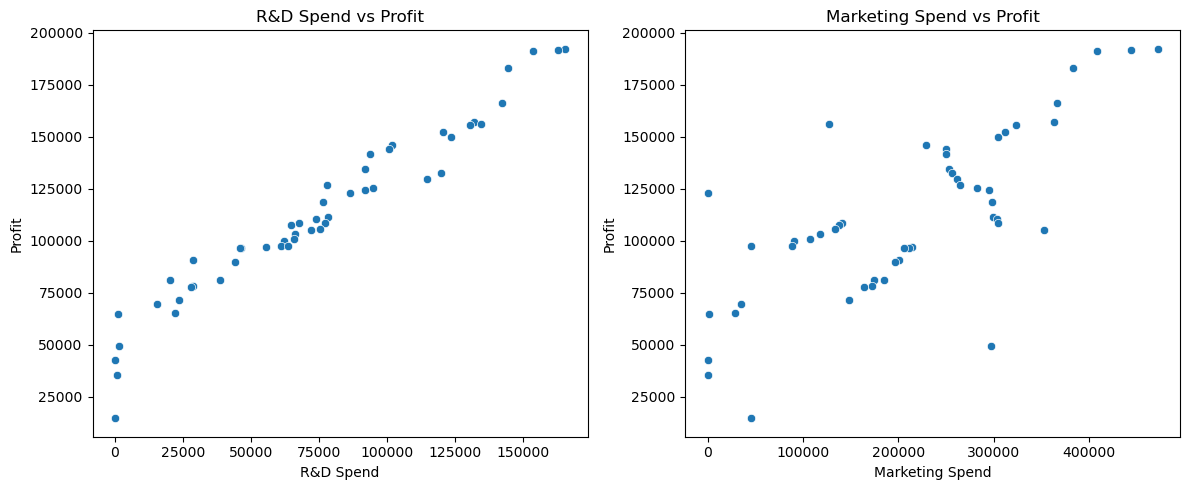

In [4]:
X = df[['R&D Spend', 'Marketing Spend']]
y = df['Profit']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=df["R&D Spend"], y=df["Profit"], ax=axes[0])
axes[0].set_title("R&D Spend vs Profit")

sns.scatterplot(x=df["Marketing Spend"], y=df["Profit"], ax=axes[1])
axes[1].set_title("Marketing Spend vs Profit")

plt.tight_layout()
plt.show()
"""
Insights from Scatter Plots:
   A near-linear relationship is observed between R&D Spend and Profit.
   Similarly, Marketing Spend and Profit show a linear trend.
   This supports their suitability for linear regression modeling.
"""

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
"""
7) Model Evaluation:
    A higher R² (close to 1) indicates the model effectively explains variance.
    A lower RMSE signifies better predictive performance.
"""

In [6]:
print(f"Training RMSE: {rmse_train:.4f}, Training R²: {r2_train:.4f}")
print(f"Testing RMSE: {rmse_test:.4f}, Testing R²: {r2_test:.4f}")

Training RMSE: 9101.1915, Training R²: 0.9519
Testing RMSE: 8206.3288, Testing R²: 0.9168
